In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sspals
from mc_sspals.core import initialize, convert, annihilate
from mc_sspals.tools import spectrum

In [3]:
num = int(1e5)
sigma_x = 1e-3
sigma_t = 2e-9
eff = 0.3
df = initialize(num, sigma_t=sigma_t, sigma_x=sigma_x)
df = convert(df, eff=eff)
df.groupby('status').count()

,lifetime,ti,xi,yi,zi,vx,vy,vz
status,,,,,,,,
e+,70099,70099,70099,70099,70099,0,0,0
o-Ps,29901,29901,29901,29901,29901,29901,29901,29901


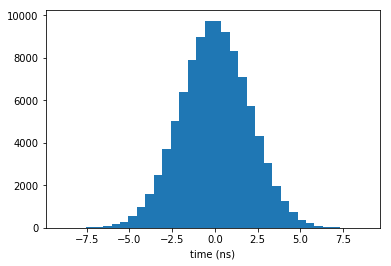

In [4]:
fig, ax = plt.subplots()
ax.hist(df['ti'] *1e9, bins=36)
ax.set_xlabel('time (ns)')
plt.show()

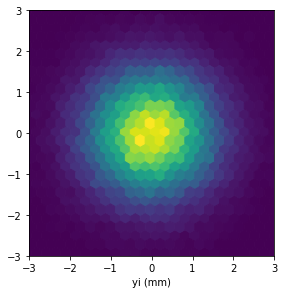

In [5]:
fig, ax = plt.subplots()
ax.set_aspect(1)
plt.hexbin(df['xi']*1e3, df['yi']*1e3, gridsize=36)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
plt.tight_layout()

ax.set_xlabel('xi (mm)')
ax.set_xlabel('yi (mm)')
plt.show()

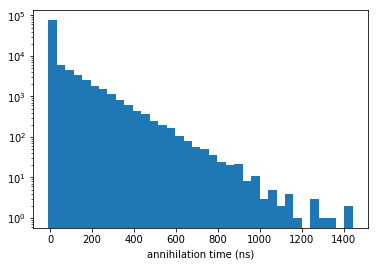

In [6]:
ann = annihilate(df)

fig, ax = plt.subplots()
ax.hist((ann['tf'])*1e9, bins=36)
ax.set_xlabel('annihilation time (ns)')
ax.set_yscale('log')
plt.show()

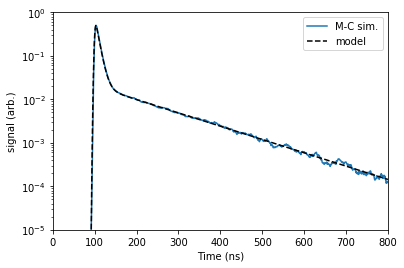

In [7]:
kappa = 8e-9
# plotting
fig, ax = plt.subplots(figsize=(6, 4))

# MC
xoffset = 1e-7
xvals, yvals = spectrum(ann, amp=0.5, dt=1e-9, kappa=kappa)
ax.plot((xvals + xoffset)* 1e9, yvals, label='M-C sim.')

# model
sim = sspals.sim(xvals - xoffset, amp=0.5, sigma=sigma_t, eff=eff, kappa=kappa)
ax.plot(xvals * 1e9, sim, ls='--', c='k', label='model')

# format
ax.legend(loc=0)
ax.set_yscale('log')
ax.set_ylabel("signal (arb.)")
ax.set_xlabel("Time (ns)")
ax.set_ylim(1e-5, 1)
ax.set_xlim(0, 800)

#output
plt.show()